dataset: `https://huggingface.co/datasets/paint-by-inpaint/PIPE_Masks`

`https://huggingface.co/datasets/paint-by-inpaint/PIPE/viewer/default/train`

In [1]:
from datasets import load_dataset
import os
from PIL import Image
import io
from IPython.display import display


In [2]:
# Use streaming = True to avoid full download
pipe = load_dataset("paint-by-inpaint/PIPE", split="train", streaming=True)
pipe_masks = load_dataset("paint-by-inpaint/PIPE_Masks", split="train", streaming=True)


Resolving data files:   0%|          | 0/162 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/162 [00:00<?, ?it/s]

In [3]:
pipe_masks.features 
pipe.features 

{'source_img': Image(mode=None, decode=True, id=None),
 'target_img': Image(mode=None, decode=True, id=None),
 'Instruction_VLM-LLM': Value(dtype='string', id=None),
 'Instruction_Class': Value(dtype='string', id=None),
 'Instruction_Ref_Dataset': Value(dtype='string', id=None),
 'object_location': Value(dtype='string', id=None),
 'target_img_dataset': Value(dtype='string', id=None),
 'img_id': Value(dtype='string', id=None),
 'ann_id': Value(dtype='string', id=None)}

Sample 0 — type: <class 'str'>, value: Add a person wearing a black shirt and a cap, bending over a motorcycle
Sample 0 — type: <class 'PIL.JpegImagePlugin.JpegImageFile'>, size: (512, 512)


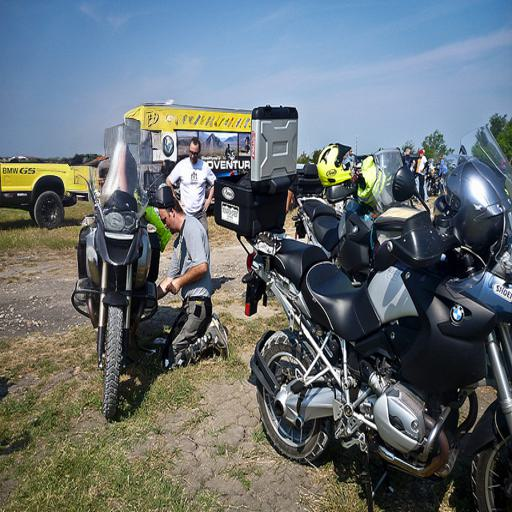

Sample 0 — type: <class 'PIL.JpegImagePlugin.JpegImageFile'>, size: (512, 512)


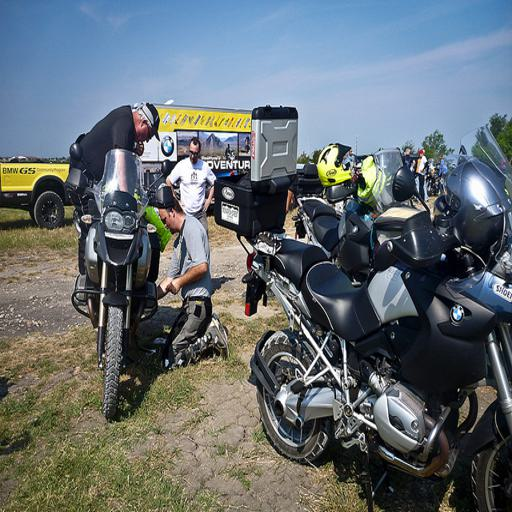

Sample 1 — type: <class 'str'>, value: Add a person in yellow jacket
Sample 1 — type: <class 'PIL.JpegImagePlugin.JpegImageFile'>, size: (512, 512)


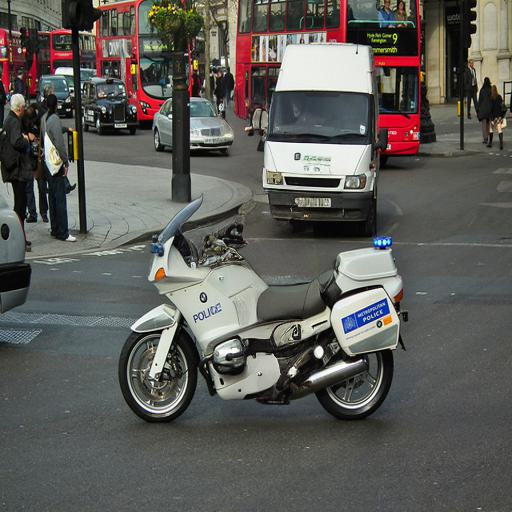

Sample 1 — type: <class 'PIL.JpegImagePlugin.JpegImageFile'>, size: (512, 512)


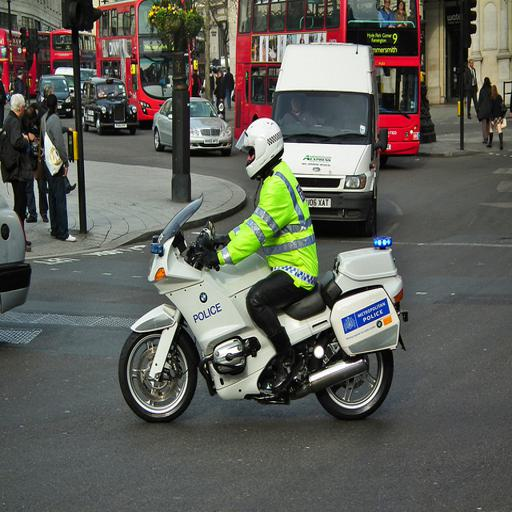

Sample 2 — type: <class 'str'>, value: Add a round clock with Roman numerals and a gold-colored centerpiece
Sample 2 — type: <class 'PIL.JpegImagePlugin.JpegImageFile'>, size: (512, 512)


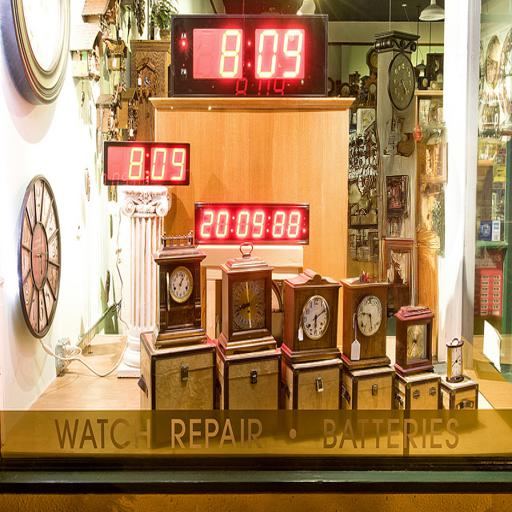

Sample 2 — type: <class 'PIL.JpegImagePlugin.JpegImageFile'>, size: (512, 512)


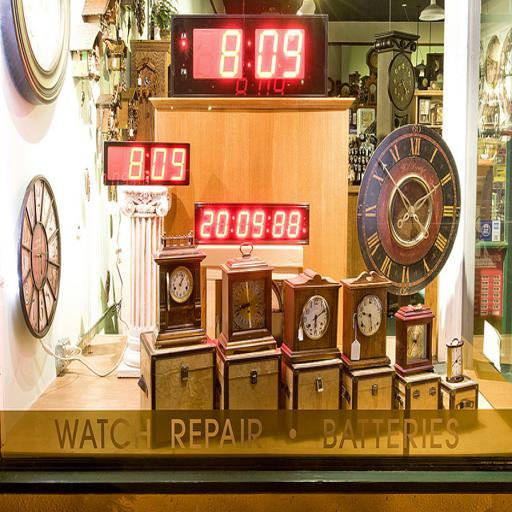

In [4]:
for i, sample in enumerate(pipe):
    instruction_vlm_llm = sample["Instruction_VLM-LLM"]
    print(f"Sample {i} — type: {type(instruction_vlm_llm)}, value: {instruction_vlm_llm}")
    img = sample["source_img"]
    print(f"Sample {i} — type: {type(img)}, size: {img.size}")
    display(img)  # Show inline if using Jupyter
    target_img = sample["target_img"]
    print(f"Sample {i} — type: {type(target_img)}, size: {target_img.size}")
    display(target_img)  # Show inline if using Jupyter
    if i == 2:
        break
    


Sample 0 — type: <class 'PIL.JpegImagePlugin.JpegImageFile'>, size: (512, 512)


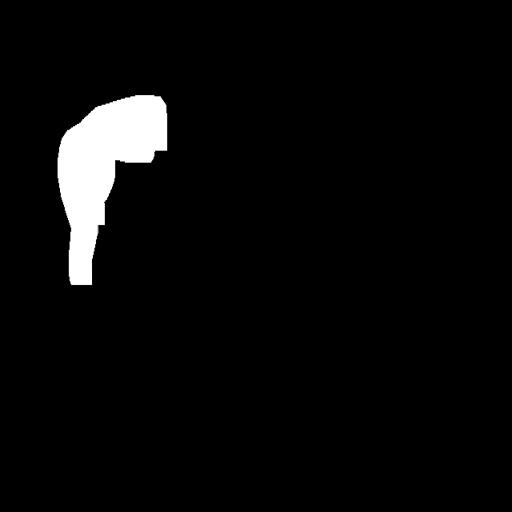

Sample 1 — type: <class 'PIL.JpegImagePlugin.JpegImageFile'>, size: (512, 512)


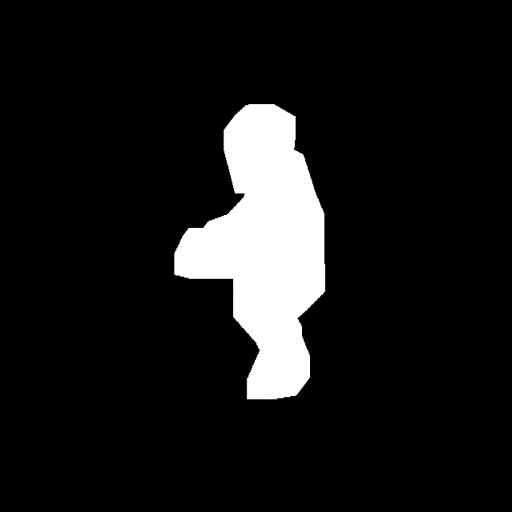

Sample 2 — type: <class 'PIL.JpegImagePlugin.JpegImageFile'>, size: (512, 512)


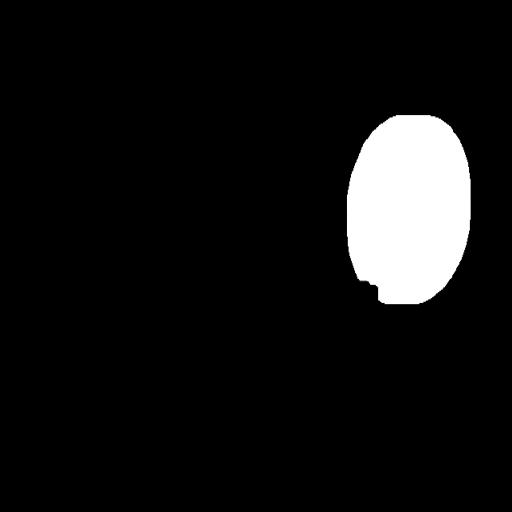

In [5]:
for i, sample in enumerate(pipe_masks):
    mask = sample["mask"]
    print(f"Sample {i} — type: {type(mask)}, size: {mask.size}")
    
    display(mask)  # Show inline if using Jupyter
    
    if i == 2:
        break


#### **Mini-dataset for pipeline check** renamed properly the source target folders

In [8]:
folder_path = r"C:\Users\magda\Desktop\μεταπτυχιακο\deep learning\project\mini_dataset"
os.makedirs(folder_path, exist_ok=True)

In [9]:
source_images_path = r"C:\Users\magda\Desktop\μεταπτυχιακο\deep learning\project\mini_dataset\source_images"
os.makedirs(source_images_path, exist_ok=True)

target_images_path = r"C:\Users\magda\Desktop\μεταπτυχιακο\deep learning\project\mini_dataset\target_images"
os.makedirs(target_images_path, exist_ok=True)

instructions_path = r"C:\Users\magda\Desktop\μεταπτυχιακο\deep learning\project\mini_dataset\instructions"
os.makedirs(instructions_path, exist_ok=True)

for i, sample in enumerate(pipe):

	instruction_vlm_llm = sample["Instruction_VLM-LLM"]
	source_img = sample["source_img"]
	target_img = sample["target_img"]
	
	# Save the images
	source_img.save(os.path.join(target_images_path, f"target_img_{i}.png"))
	target_img.save(os.path.join(source_images_path, f"source_img_{i}.png"))
	
	# Save the instruction
	with open(os.path.join(instructions_path, f"instruction_{i}.txt"), "w") as f:
		f.write(instruction_vlm_llm)
	
	if i == 199:
		break

fix the txt prompts